<a href="https://colab.research.google.com/github/saipragna25/deep-learning-vision-classifiers-assignment/blob/main/DL_high_performance_vision_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Visualisig workig of convolution layers 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [27]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name="Conv1"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name="Conv2"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
model.fit(x_train[..., np.newaxis], y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1302 - accuracy: 0.9602
Epoch 2/2
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0418 - accuracy: 0.9867


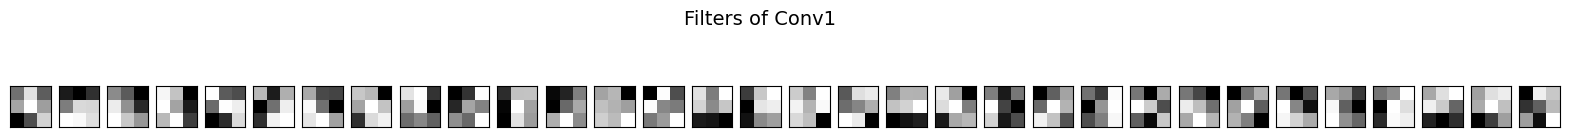

1/1 [==============================] - 0s 53ms/step


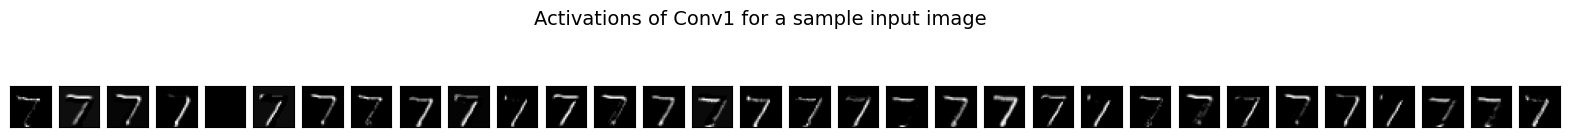

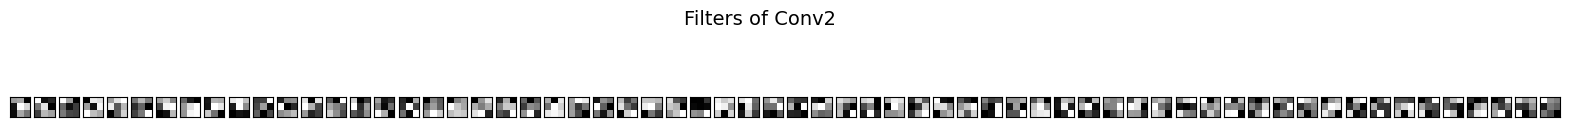

1/1 [==============================] - 0s 60ms/step


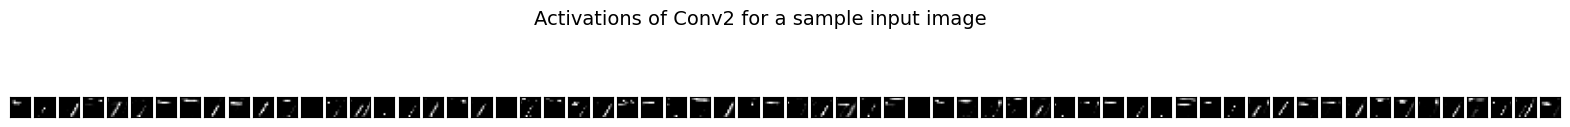

In [29]:
def visualize_conv_layer(layer_name, input_image, model):
    # Get the layer and its filters
    layer = model.get_layer(layer_name)
    filters, _ = layer.get_weights()
    
    # Normalize the filters for visualization
    f_min, f_max = np.amin(filters), np.amax(filters)
    filters = (filters - f_min) / (f_max - f_min)

    # Plot the filters
    n_filters = filters.shape[-1]
    fig, axs = plt.subplots(1, n_filters, figsize=(20, 2))
    for i in range(n_filters):
        axs[i].imshow(filters[:, :, 0, i], cmap='gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.suptitle(f'Filters of {layer_name}', fontsize=14)
    plt.show()

    # Get the activations
    intermediate_model = models.Model(inputs=model.inputs, outputs=layer.output)
    activations = intermediate_model.predict(input_image[np.newaxis, ..., np.newaxis])

    # Plot the activations
    n_activations = activations.shape[-1]
    fig, axs = plt.subplots(1, n_activations, figsize=(20, 2))
    for i in range(n_activations):
        axs[i].imshow(activations[0, :, :, i], cmap='gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    plt.suptitle(f'Activations of {layer_name} for a sample input image', fontsize=14)
    plt.show()

# Choose a sample input image
sample_image = x_test[0]

# Visualize the filters and activations of Conv1 and Conv2
visualize_conv_layer("Conv1", sample_image, model)
visualize_conv_layer("Conv2", sample_image, model)


b)DepthwisePooling

In [30]:
class DepthwisePooling(layers.Layer):
    def __init__(self, pool_size, **kwargs):
        super(DepthwisePooling, self).__init__(**kwargs)
        self.pool_size = pool_size

    def build(self, input_shape):
        super(DepthwisePooling, self).build(input_shape)
        self.depthwise_conv2d = layers.DepthwiseConv2D(
            kernel_size=self.pool_size,
            strides=self.pool_size,
            padding='valid',
            depth_multiplier=1
        )
        self.average_pooling2d = layers.AveragePooling2D(pool_size=(1, 1), strides=None, padding='valid')

    def call(self, inputs):
        x = self.depthwise_conv2d(inputs)
        x = self.average_pooling2d(x)
        return x

    def get_config(self):
        config = super(DepthwisePooling, self).get_config()
        config.update({'pool_size': self.pool_size})
        return config


In [31]:
model_dw = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    DepthwisePooling(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    DepthwisePooling(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_dw.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
model_dw.fit(x_train[..., np.newaxis], y_train, epochs=2)


Epoch 1/2
1875/1875 [==============================] - 67s 35ms/step - loss: 0.2134 - accuracy: 0.9345
Epoch 2/2
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0554 - accuracy: 0.9826


In [33]:
test_loss, test_acc = model_dw.evaluate(x_test[..., np.newaxis], y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 [==============================] - 5s 14ms/step - loss: 0.0410 - accuracy: 0.9871
Test accuracy: 0.9871
